In [13]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

sys.path.append('../src')

from data_utils import Odometry, Landscape

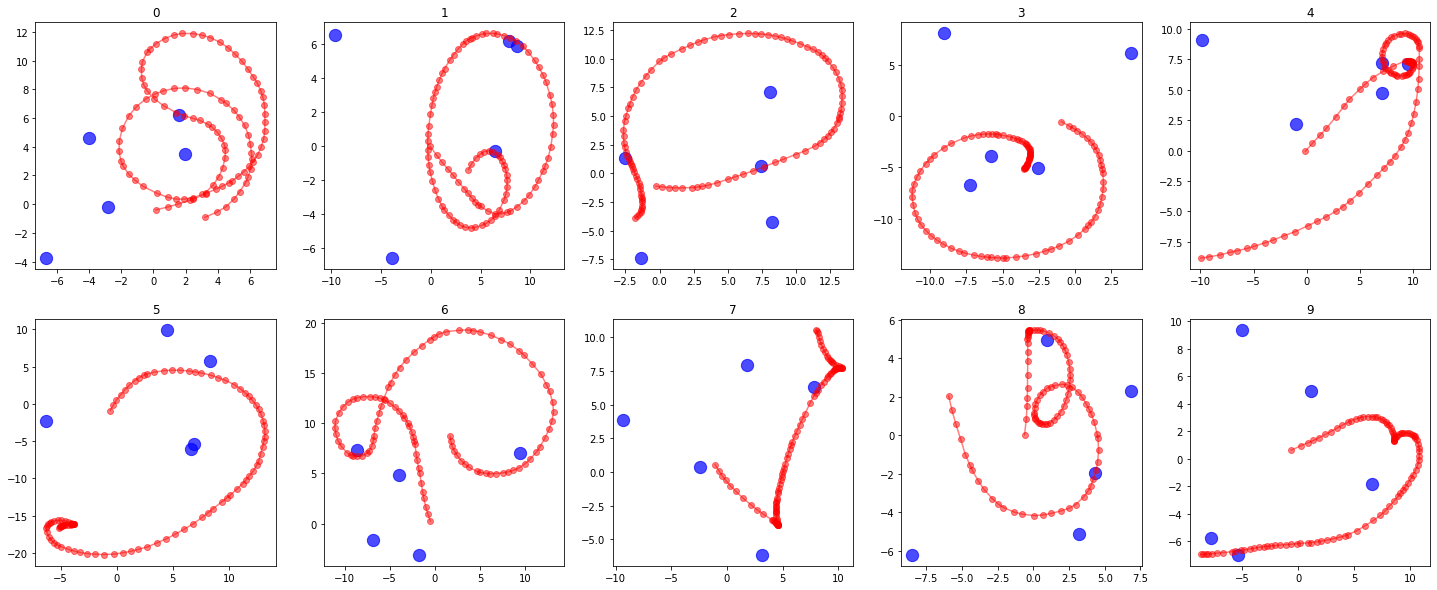

<Figure size 432x288 with 0 Axes>

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

np.random.seed(42)

landmarks = []
trajs = []
times = []
motions = []
for i, (seed, ax) in enumerate(zip(np.random.randint(0, 1000, 10), axs.flat)):
    np.random.seed(seed)
    landscape = Landscape(5)
    landscape.initialize()
    odometry = Odometry(landscape)
    odometry.generate(100)
    states = np.stack(odometry.states,0)
    ax.plot(states[:, 0], states[:, 1], '-o', c='r', alpha=0.5)
    lands = landscape.landmarks
    ax.scatter(lands[:, 0], lands[:, 1], c='b', alpha=0.7, s=150)
    ax.set_title(f'{i}')
    #ax.set_aspect('equal')

    landmarks.append(lands)
    trajs.append(states)
    times.append(odometry.times)
    motions.append(odometry.motions)
plt.show()
plt.savefig('../figs/trajectories.pdf')

In [41]:
np.savez('../data/trajs', lands=landmarks, states=trajs, times=times, motions=motions)